### Out of the box

/Users/Frankie/anaconda3/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/Users/Frankie/anaconda3/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /Users/Frankie/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

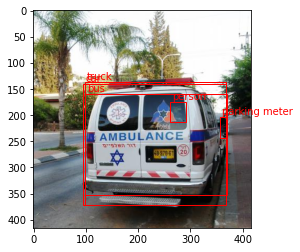

In [1]:
from detecto import core, utils, visualize

image = utils.read_image('test/00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg')
model = core.Model()

labels, boxes, scores = model.predict_top(image)
visualize.show_labeled_image(image, boxes, labels)

It calls it a truck and a bus! even sees the parking meter

### Let's fine tune our model

In [3]:
dataset = core.Dataset('train/')
model = core.Model(['Ambulance', 'Bus', 'Car', 'Motorcycle', 'Truck'])

model.fit(dataset)

/Users/Frankie/anaconda3/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/Users/Frankie/anaconda3/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


It looks like you're training your model on a CPU. Consider switching to a GPU; otherwise, this method can take hours upon hours or even days to finish. For more information, see https://detecto.readthedocs.io/en/latest/usage/quickstart.html#technical-requirements
Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 878/878 [2:52:57<00:00, 11.82s/it]  


Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 878/878 [2:46:49<00:00, 11.40s/it]  


Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 878/878 [2:44:13<00:00, 11.22s/it]  


Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 878/878 [2:43:36<00:00, 11.18s/it]  


Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 878/878 [2:49:56<00:00, 11.61s/it]  


Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 878/878 [2:42:17<00:00, 11.09s/it]  


Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 878/878 [2:29:40<00:00, 10.23s/it]  


Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 878/878 [2:34:33<00:00, 10.56s/it]  


Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 878/878 [2:31:00<00:00, 10.32s/it]  


Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 878/878 [2:27:32<00:00, 10.08s/it]  


### We can save this trained model as a file and reload it for later use

In [8]:
model.save('model_weights.pth')

In [ ]:
# ... Later ...
model = core.Model.load('model_weights.pth', ['Ambulance', 'Bus', 'Car', 'Motorcycle', 'Truck'])

### let's test our trained model on a single image

In [4]:
# Specify the path to your image
image = utils.read_image('test/00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg')
predictions = model.predict(image)

# predictions format: (labels, boxes, scores)
labels, boxes, scores = predictions

# ['alien', 'bat', 'bat']
print(labels) 

#           xmin       ymin       xmax       ymax
# tensor([[ 569.2125,  203.6702, 1003.4383,  658.1044],
#         [ 276.2478,  144.0074,  579.6044,  508.7444],
#         [ 277.2929,  162.6719,  627.9399,  511.9841]])
print(boxes)

# tensor([0.9952, 0.9837, 0.5153])
print(scores)

['Ambulance', 'Truck', 'Bus']
tensor([[ 94.6395, 117.5430, 370.9315, 372.9176],
        [101.1503, 121.1329, 377.8582, 380.4377],
        [101.9967, 128.8840, 374.8088, 374.0025]])
tensor([0.9875, 0.1139, 0.0573])


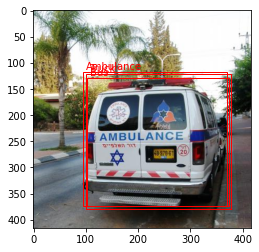

In [5]:
visualize.show_labeled_image(image, boxes, labels)

Our model is now fine tuned and our classes are defined - in this case it reads 3 of our classes which in essence are all true, well maybe it's not a bus

### let's try another image

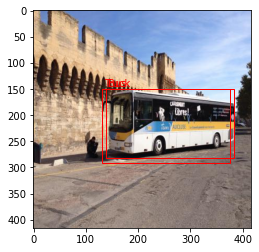

In [7]:
image = utils.read_image('test/6a16101bb9217422_jpg.rf.8WKpVgqqjh9DUhom2WOC.jpg')
predictions = model.predict(image)

# predictions format: (labels, boxes, scores)
labels, boxes, scores = predictions
visualize.show_labeled_image(image, boxes, labels)


Reads it a Truck and a Bus

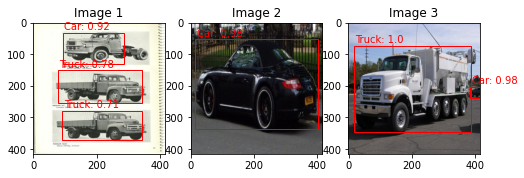

In [14]:
raw_images = ["test/2eaf88e3156629c6_jpg.rf.2a8LCMIPEihcmaF7wMjX.jpg", "test/6dce4caa5b30c32a_jpg.rf.ptCAjjugxBjYRY2Pe2IP.jpg", "test/4ecafc9a0bae8003_jpg.rf.2UbsFgyK4QxCrSNix6wM.jpg"]
images = [utils.read_image(x) for x in raw_images]
visualize.plot_prediction_grid(model, images, dim=(1, 3), figsize=(8, 16))

In [16]:
from torchsummary import summary
summary(model, (3, 224, 224))

AttributeError: 'Model' object has no attribute 'apply'